# کدهای پیاده سازی پروژه پایان ترم بیگ دیتا  - امین زایراومالی

# وارد کردن کتابخانه های مورد نیاز پایتون

In [1]:
# first neural network with keras tutorial with letter Dataset
# Dataset Link : https://archive.ics.uci.edu/ml/datasets/Letter+Recognition
# Powered By Amin Zayeromali  - amin.Zayeroamli@gmail.com
from numpy import loadtxt
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.utils.vis_utils import plot_model
import tensorflow as tf
from keras.models import Model,load_model
from sklearn import preprocessing
import math

## بارگزاری دیتاست و توضیحات مشخصه آن

In [9]:
# DataSet Information
# Author: David J. Slate  
# Source: [UCI](https://archive.ics.uci.edu/ml/datasets/Letter+Recognition) - 01-01-1991  
# Please cite: P. W. Frey and D. J. Slate. "Letter Recognition Using Holland-style Adaptive Classifiers". Machine Learning 6(2), 1991  

# TITLE:  Letter Image Recognition Data 
#
#    The objective is to identify each of a large number of black-and-white
#    rectangular pixel displays as one of the 26 capital letters in the English
#    alphabet.  The character images were based on 20 different fonts and each
#    letter within these 20 fonts was randomly distorted to produce a file of
#    20,000 unique stimuli.  Each stimulus was converted into 16 primitive
#    numerical attributes (statistical moments and edge counts) which were then
#    scaled to fit into a range of integer values from 0 through 15.  We
#    typically train on the first 16000 items and then use the resulting model
#    to predict the letter category for the remaining 4000.  See the article
#    cited above for more details.

# load the dataset
dataset = loadtxt('dataset_6_letter.txt', dtype=str, delimiter=',')
# split into input (X) and output (y) variables 
X = dataset[:10000,0:16] # انتخاب ۱۰۰۰۰ هزار رکورد از داده ها برای ترین
X = X.astype(float)
y = dataset[:10000,16]
le = preprocessing.LabelEncoder()
y = le.fit_transform(y).astype(int)
print("Number Of Unique Label on Target :", len(set(y)))  # تعداد کلاسهای یونیک مشخص می شود
y = tf.keras.utils.to_categorical(y, num_classes=len(set(y))) # تبدیل داده های اینتیجر لیبل به باینری

Number Of Unique Label on Target : 26


In [10]:
# نمایش تعداد رکوردهای دیتاست ( فیچرها و لیبلهای تارگت )
print(X.shape) 
print(y.shape)
print(X)

(10000, 16)
(10000, 26)
[[ 2.  4.  4. ...  8.  5.  6.]
 [ 4.  7.  5. ...  9.  7. 10.]
 [ 7. 10.  8. ...  5.  5. 10.]
 ...
 [ 5. 10.  5. ...  9.  4. 11.]
 [ 3.  6.  5. ... 10.  3. 10.]
 [ 6. 10.  7. ...  8.  4.  8.]]


In [11]:
print(y)  # لیبل بندی کلاسهای خروجی براساس تعداد اپوچ های خروجی با فرمت باینری

[[0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


# ساخت مدل برای دیتاست مذکور که به صورت چند کلاسه 

##  مرحله اول فقط دو لایه پنهان با ورودی ۱۶ تایی و خروجی ۲۶ تایی ساخته و فیت می کنیم

param_number = output_channel_number * (input_channel_number + 1)

In [12]:
# define the keras model
model = Sequential()
model.add(Dense(32, input_dim=16, activation='relu')) # تعداد نورون های ورودی برابر با فیچر ها ۱۶ تاست
#model.add(Dense(64, activation='relu'))
model.add(Dense(26, activation='sigmoid')) #تعداد نورون های خروجی نیز برابر با تعداد لیبلهای غیر تکراری کلاس تارگت گرفتیم
# compile the keras model
#from keral.optimizer import adam
model.compile(loss='categorical_crossentropy', optimizer='RMSProp' , metrics=['accuracy'])#categorical_crossentropy or #binary_crossentropy 
print(model.summary())
plot_model(model, show_shapes=True, to_file='mymodel.png')

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 32)                544       
                                                                 
 dense_3 (Dense)             (None, 26)                858       
                                                                 
Total params: 1,402
Trainable params: 1,402
Non-trainable params: 0
_________________________________________________________________
None
('You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) ', 'for plot_model/model_to_dot to work.')


## مدل را برای مقادیر epochs=50, batch_size=10 ساخته و فیت می کنیم

In [14]:
# fit the keras model on the dataset
history= model.fit(X, y, epochs=50, batch_size=10)

Epoch 1/50
1000/1000 [==============================] - 2s 2ms/step - loss: 0.5951 - accuracy: 0.8306
Epoch 2/50
1000/1000 [==============================] - 2s 2ms/step - loss: 0.5918 - accuracy: 0.8328
Epoch 3/50
1000/1000 [==============================] - 2s 2ms/step - loss: 0.5835 - accuracy: 0.8335
Epoch 4/50
1000/1000 [==============================] - 2s 2ms/step - loss: 0.5896 - accuracy: 0.8319
Epoch 5/50
1000/1000 [==============================] - 2s 2ms/step - loss: 0.5858 - accuracy: 0.8331
Epoch 6/50
1000/1000 [==============================] - 2s 2ms/step - loss: 0.5820 - accuracy: 0.8346
Epoch 7/50
1000/1000 [==============================] - 2s 2ms/step - loss: 0.5827 - accuracy: 0.8327
Epoch 8/50
1000/1000 [==============================] - 2s 2ms/step - loss: 0.5806 - accuracy: 0.8320
Epoch 9/50
1000/1000 [==============================] - 2s 2ms/step - loss: 0.5835 - accuracy: 0.8350
Epoch 10/50
1000/1000 [==============================] - 2s 2ms/step - loss: 0.577

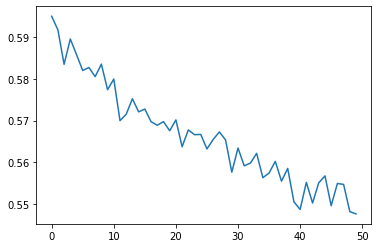

In [15]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(history.history['loss'])

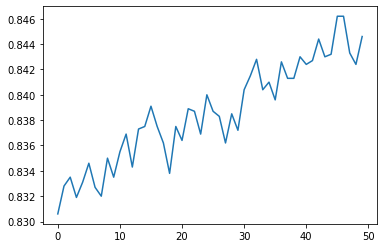

In [16]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(history.history['accuracy'])

In [17]:
# evaluate the keras model
_, accuracy = model.evaluate(X, y)
print('Accuracy: %.2f' % (accuracy*100))

313/313 [==============================] - 1s 2ms/step - loss: 0.5481 - accuracy: 0.8460
Accuracy: 84.60


In [18]:
predictions = model.predict(X)
# summarize the first 5 cases
for i in range(10):
    print("\n------------------------------- Case ",i+1," ---------------------------------------------------\n")
    print("Data is :\n", X[i].tolist(),"\nPredicted Value is :\n" , predictions[i],"\nReal Value is :\n", y[i])


------------------------------- Case  1  ---------------------------------------------------

Data is :
 [2.0, 4.0, 4.0, 3.0, 2.0, 7.0, 8.0, 2.0, 9.0, 11.0, 7.0, 7.0, 1.0, 8.0, 5.0, 6.0] 
Predicted Value is :
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.] 
Real Value is :
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 1.]

------------------------------- Case  2  ---------------------------------------------------

Data is :
 [4.0, 7.0, 5.0, 5.0, 5.0, 5.0, 9.0, 6.0, 4.0, 8.0, 7.0, 9.0, 2.0, 9.0, 7.0, 10.0] 
Predicted Value is :
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.] 
Real Value is :
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]

------------------------------- Case  3  ---------------------------------------------------

Data is :
 [7.0, 10.0, 8.0, 7.0, 4.0, 8.0, 8.0, 5.0, 10.0, 11.0, 2.0, 8.0, 2.0, 5.0, 5.0, 10.0] 
Predicted Value is :
 [0. 

## مدل را برای مقادیر epochs=100, batch_size=50 ساخته و فیت می کنیم

In [22]:
# define the keras model
model = Sequential()
model.add(Dense(32, input_dim=16, activation='relu')) # تعداد نورون های ورودی برابر با فیچر ها ۱۶ تاست
#model.add(Dense(64, activation='relu'))
model.add(Dense(26, activation='sigmoid')) #تعداد نورون های خروجی نیز برابر با تعداد لیبلهای غیر تکراری کلاس تارگت گرفتیم
# compile the keras model
#from keral.optimizer import adam
model.compile(loss='categorical_crossentropy', optimizer='RMSProp' , metrics=['accuracy'])#categorical_crossentropy or #binary_crossentropy 
print(model.summary())
plot_model(model, show_shapes=True, to_file='mymodel.png')

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 32)                544       
                                                                 
 dense_9 (Dense)             (None, 26)                858       
                                                                 
Total params: 1,402
Trainable params: 1,402
Non-trainable params: 0
_________________________________________________________________
None
('You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) ', 'for plot_model/model_to_dot to work.')


In [23]:
# fit the keras model on the dataset
history= model.fit(X, y, epochs=100, batch_size=50)

Epoch 1/100
200/200 [==============================] - 1s 2ms/step - loss: 3.5190 - accuracy: 0.1459
Epoch 2/100
200/200 [==============================] - 0s 2ms/step - loss: 2.1425 - accuracy: 0.3883
Epoch 3/100
200/200 [==============================] - 0s 2ms/step - loss: 1.6569 - accuracy: 0.5355
Epoch 4/100
200/200 [==============================] - 0s 2ms/step - loss: 1.4276 - accuracy: 0.5957
Epoch 5/100
200/200 [==============================] - 0s 2ms/step - loss: 1.2990 - accuracy: 0.6312
Epoch 6/100
200/200 [==============================] - 0s 2ms/step - loss: 1.2116 - accuracy: 0.6599
Epoch 7/100
200/200 [==============================] - 0s 2ms/step - loss: 1.1469 - accuracy: 0.6843
Epoch 8/100
200/200 [==============================] - 0s 2ms/step - loss: 1.0972 - accuracy: 0.6946
Epoch 9/100
200/200 [==============================] - 0s 2ms/step - loss: 1.0528 - accuracy: 0.7081
Epoch 10/100
200/200 [==============================] - 0s 2ms/step - loss: 1.0189 - accura

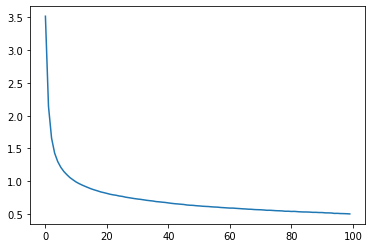

In [24]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(history.history['loss'])

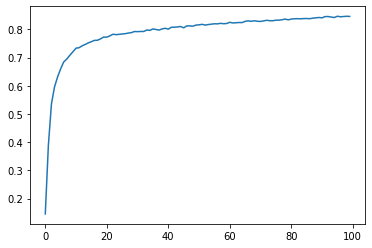

In [25]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(history.history['accuracy'])

In [26]:
# evaluate the keras model
_, accuracy = model.evaluate(X, y)
print('Accuracy: %.2f' % (accuracy*100))

313/313 [==============================] - 1s 2ms/step - loss: 0.5105 - accuracy: 0.8397
Accuracy: 83.97


In [27]:
predictions = model.predict(X)
# summarize the first 5 cases
for i in range(10):
    print("\n------------------------------- Case ",i+1," ---------------------------------------------------\n")
    print("Data is :\n", X[i].tolist(),"\nPredicted Value is :\n" , predictions[i],"\nReal Value is :\n", y[i])


------------------------------- Case  1  ---------------------------------------------------

Data is :
 [2.0, 4.0, 4.0, 3.0, 2.0, 7.0, 8.0, 2.0, 9.0, 11.0, 7.0, 7.0, 1.0, 8.0, 5.0, 6.0] 
Predicted Value is :
 [5.0791823e-12 9.4748664e-10 1.2060948e-11 5.8751726e-10 6.6218621e-07
 2.9167737e-08 3.4936717e-12 4.5911338e-13 1.2157548e-07 2.5409574e-06
 5.9689021e-13 4.7515596e-09 2.1567156e-20 5.1742665e-19 2.7170157e-16
 2.7021717e-13 6.1899943e-13 6.1158577e-14 2.2441856e-05 1.9091628e-09
 7.1929551e-16 2.6599331e-17 1.8550800e-37 1.6649376e-07 4.2550276e-11
 1.7629040e-03] 
Real Value is :
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 1.]

------------------------------- Case  2  ---------------------------------------------------

Data is :
 [4.0, 7.0, 5.0, 5.0, 5.0, 5.0, 9.0, 6.0, 4.0, 8.0, 7.0, 9.0, 2.0, 9.0, 7.0, 10.0] 
Predicted Value is :
 [5.70015226e-13 7.28875715e-09 1.03611715e-08 2.05981135e-11
 1.02846037e-07 1.97222967e-08 2.32125394e-08 1

#   مدل را سه لایه پنهان  و برای مقادیر توینیگ شده و بهینه فیت و ترین می کنیم 

In [28]:
# define the keras model
model = Sequential()
model.add(Dense(32, input_dim=16, activation='relu')) # تعداد نورون های ورودی برابر با فیچر ها ۱۶ تاست
model.add(Dense(64, activation='relu'))
model.add(Dense(26, activation='sigmoid')) #تعداد نورون های خروجی نیز برابر با تعداد لیبلهای غیر تکراری کلاس تارگت گرفتیم
# compile the keras model
#from keral.optimizer import adam
model.compile(loss='categorical_crossentropy', optimizer='RMSProp' , metrics=['accuracy'])#categorical_crossentropy or #binary_crossentropy 
print(model.summary())
plot_model(model, show_shapes=True, to_file='mymodel.png')

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 32)                544       
                                                                 
 dense_11 (Dense)            (None, 64)                2112      
                                                                 
 dense_12 (Dense)            (None, 26)                1690      
                                                                 
Total params: 4,346
Trainable params: 4,346
Non-trainable params: 0
_________________________________________________________________
None
('You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) ', 'for plot_model/model_to_dot to work.')


In [29]:
# fit the keras model on the dataset
history= model.fit(X, y, epochs=100, batch_size=50)

Epoch 1/100
200/200 [==============================] - 1s 2ms/step - loss: 2.6641 - accuracy: 0.2503
Epoch 2/100
200/200 [==============================] - 0s 2ms/step - loss: 1.6464 - accuracy: 0.5448
Epoch 3/100
200/200 [==============================] - 0s 2ms/step - loss: 1.3081 - accuracy: 0.6345
Epoch 4/100
200/200 [==============================] - 0s 2ms/step - loss: 1.1358 - accuracy: 0.6819
Epoch 5/100
200/200 [==============================] - 0s 2ms/step - loss: 1.0229 - accuracy: 0.7112
Epoch 6/100
200/200 [==============================] - 0s 2ms/step - loss: 0.9483 - accuracy: 0.7295
Epoch 7/100
200/200 [==============================] - 0s 2ms/step - loss: 0.8882 - accuracy: 0.7512
Epoch 8/100
200/200 [==============================] - 0s 2ms/step - loss: 0.8361 - accuracy: 0.7614
Epoch 9/100
200/200 [==============================] - 0s 2ms/step - loss: 0.7942 - accuracy: 0.7699
Epoch 10/100
200/200 [==============================] - 0s 2ms/step - loss: 0.7521 - accura

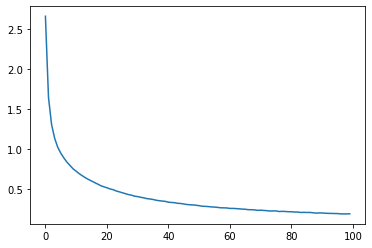

In [30]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(history.history['loss'])

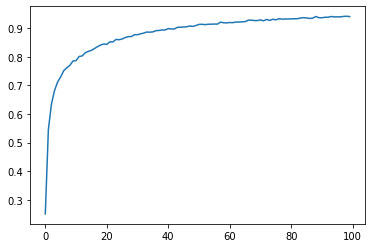

In [31]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(history.history['accuracy'])

In [32]:
# evaluate the keras model
_, accuracy = model.evaluate(X, y)
print('Accuracy: %.2f' % (accuracy*100))

313/313 [==============================] - 1s 2ms/step - loss: 0.1681 - accuracy: 0.9463
Accuracy: 94.63


In [33]:
predictions = model.predict(X)
# summarize the first 5 cases
for i in range(10):
    print("\n------------------------------- Case ",i+1," ---------------------------------------------------\n")
    print("Data is :\n", X[i].tolist(),"\nPredicted Value is :\n" , predictions[i],"\nReal Value is :\n", y[i])


------------------------------- Case  1  ---------------------------------------------------

Data is :
 [2.0, 4.0, 4.0, 3.0, 2.0, 7.0, 8.0, 2.0, 9.0, 11.0, 7.0, 7.0, 1.0, 8.0, 5.0, 6.0] 
Predicted Value is :
 [3.3699525e-27 1.7475883e-27 3.2621699e-29 3.0790030e-25 2.9524769e-17
 2.4167027e-23 1.2374475e-30 7.9540427e-31 1.3211787e-19 2.0308410e-23
 8.4793450e-32 4.3147547e-29 0.0000000e+00 0.0000000e+00 1.8100696e-29
 7.4487800e-35 8.1395273e-32 6.3023114e-36 2.6254349e-18 2.9661869e-21
 1.1971732e-28 0.0000000e+00 0.0000000e+00 1.6084132e-19 1.7477472e-28
 5.1523476e-14] 
Real Value is :
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 1.]

------------------------------- Case  2  ---------------------------------------------------

Data is :
 [4.0, 7.0, 5.0, 5.0, 5.0, 5.0, 9.0, 6.0, 4.0, 8.0, 7.0, 9.0, 2.0, 9.0, 7.0, 10.0] 
Predicted Value is :
 [9.54505350e-23 1.11601105e-14 1.19543337e-15 1.67069814e-21
 9.99040125e-14 8.54327568e-13 9.47142183e-16 1

# این بار مدل را برای اپوچ ۲۵۰ تایی اجرا می کنیم

In [36]:
# define the keras model
model = Sequential()
model.add(Dense(32, input_dim=16, activation='relu')) # تعداد نورون های ورودی برابر با فیچر ها ۱۶ تاست
model.add(Dense(64, activation='relu'))
model.add(Dense(26, activation='sigmoid')) #تعداد نورون های خروجی نیز برابر با تعداد لیبلهای غیر تکراری کلاس تارگت گرفتیم
# compile the keras model
#from keral.optimizer import adam
model.compile(loss='categorical_crossentropy', optimizer='RMSProp' , metrics=['accuracy'])#categorical_crossentropy or #binary_crossentropy 
print(model.summary())
plot_model(model, show_shapes=True, to_file='mymodel.png')

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 32)                544       
                                                                 
 dense_19 (Dense)            (None, 64)                2112      
                                                                 
 dense_20 (Dense)            (None, 26)                1690      
                                                                 
Total params: 4,346
Trainable params: 4,346
Non-trainable params: 0
_________________________________________________________________
None
('You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) ', 'for plot_model/model_to_dot to work.')


In [37]:
# fit the keras model on the dataset
history= model.fit(X, y, epochs=250, batch_size=50)

Epoch 1/250
200/200 [==============================] - 1s 2ms/step - loss: 2.7077 - accuracy: 0.2635
Epoch 2/250
200/200 [==============================] - 0s 2ms/step - loss: 1.5854 - accuracy: 0.5566
Epoch 3/250
200/200 [==============================] - 0s 2ms/step - loss: 1.2471 - accuracy: 0.6546
Epoch 4/250
200/200 [==============================] - 0s 2ms/step - loss: 1.0862 - accuracy: 0.6920
Epoch 5/250
200/200 [==============================] - 0s 2ms/step - loss: 0.9886 - accuracy: 0.7204
Epoch 6/250
200/200 [==============================] - 0s 2ms/step - loss: 0.9168 - accuracy: 0.7394
Epoch 7/250
200/200 [==============================] - 0s 2ms/step - loss: 0.8617 - accuracy: 0.7538
Epoch 8/250
200/200 [==============================] - 0s 2ms/step - loss: 0.8078 - accuracy: 0.7678
Epoch 9/250
200/200 [==============================] - 0s 2ms/step - loss: 0.7697 - accuracy: 0.7803
Epoch 10/250
200/200 [==============================] - 0s 2ms/step - loss: 0.7275 - accura

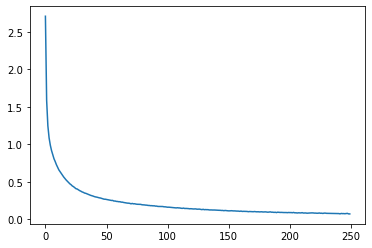

In [38]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(history.history['loss'])

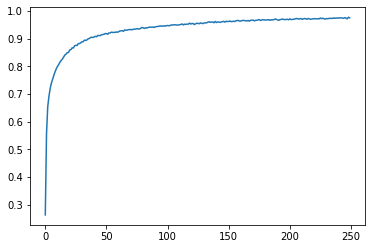

In [39]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(history.history['accuracy'])

In [40]:
# evaluate the keras model
_, accuracy = model.evaluate(X, y)
print('Accuracy: %.2f' % (accuracy*100))

313/313 [==============================] - 1s 2ms/step - loss: 0.0571 - accuracy: 0.9810
Accuracy: 98.10


In [41]:
predictions = model.predict(X)
# summarize the first 5 cases
for i in range(10):
    print("\n------------------------------- Case ",i+1," ---------------------------------------------------\n")
    print("Data is :\n", X[i].tolist(),"\nPredicted Value is :\n" , predictions[i],"\nReal Value is :\n", y[i])


------------------------------- Case  1  ---------------------------------------------------

Data is :
 [2.0, 4.0, 4.0, 3.0, 2.0, 7.0, 8.0, 2.0, 9.0, 11.0, 7.0, 7.0, 1.0, 8.0, 5.0, 6.0] 
Predicted Value is :
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 2.9780912e-36] 
Real Value is :
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 1.]

------------------------------- Case  2  ---------------------------------------------------

Data is :
 [4.0, 7.0, 5.0, 5.0, 5.0, 5.0, 9.0, 6.0, 4.0, 8.0, 7.0, 9.0, 2.0, 9.0, 7.0, 10.0] 
Predicted Value is :
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.] 
Real Value is :
 [0. 0. 0.

# ساخت مدل با ولیدیشن و استاپ لاست برای مدل بهینه تر

Epoch 1/250
790/800 [============================>.] - ETA: 0s - loss: 0.1239 - accuracy: 0.9580
Epoch 00001: val_accuracy improved from -inf to 0.93250, saving model to best_model.h5
800/800 [==============================] - 3s 3ms/step - loss: 0.1244 - accuracy: 0.9578 - val_loss: 0.2222 - val_accuracy: 0.9325
Epoch 2/250
781/800 [============================>.] - ETA: 0s - loss: 0.1337 - accuracy: 0.9553
Epoch 00002: val_accuracy improved from 0.93250 to 0.95800, saving model to best_model.h5
800/800 [==============================] - 2s 3ms/step - loss: 0.1336 - accuracy: 0.9550 - val_loss: 0.1394 - val_accuracy: 0.9580
Epoch 3/250
796/800 [============================>.] - ETA: 0s - loss: 0.1396 - accuracy: 0.9541
Epoch 00003: val_accuracy did not improve from 0.95800
800/800 [==============================] - 2s 3ms/step - loss: 0.1397 - accuracy: 0.9541 - val_loss: 0.1647 - val_accuracy: 0.9475
Epoch 4/250
795/800 [============================>.] - ETA: 0s - loss: 0.1400 - accu

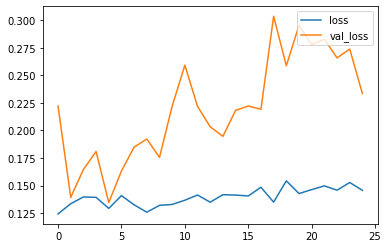

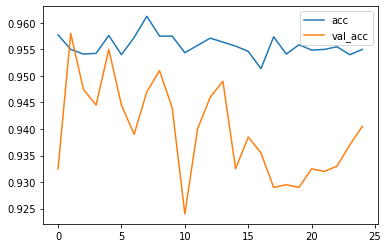

In [42]:
import matplotlib.pyplot as plt
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20)
mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)
history=model.fit(X, y, epochs=250, batch_size=10, verbose=1, validation_split=0.2,callbacks=[mc,es]) #validation_data=[test_x, test_y]
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss','val_loss'], loc='upper right')
plt.figure()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['acc','val_acc'], loc='upper right')

# با استفاده از مدل بهینه تعداد ۵ نمونه را تست میگیریم و نتایج را مشخص می کنیم

In [43]:
model=load_model('best_model.h5')
_, accuracy = model.evaluate(X, y)
print('Accuracy: %.2f' % (accuracy*100))
predictions = model.predict(X)
# summarize the first 5 cases
for i in range(5):
    print("\n------------------------------- Case ",i+1," ---------------------------------------------------\n")
    print("Data is :\n", X[i].tolist(),"\nPredicted Value is :\n" , predictions[i],"\nReal Value is :\n", y[i])

313/313 [==============================] - 1s 2ms/step - loss: 0.1135 - accuracy: 0.9628
Accuracy: 96.28

------------------------------- Case  1  ---------------------------------------------------

Data is :
 [2.0, 4.0, 4.0, 3.0, 2.0, 7.0, 8.0, 2.0, 9.0, 11.0, 7.0, 7.0, 1.0, 8.0, 5.0, 6.0] 
Predicted Value is :
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 1.3256963e-35] 
Real Value is :
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 1.]

------------------------------- Case  2  ---------------------------------------------------

Data is :
 [4.0, 7.0, 5.0, 5.0, 5.0, 5.0, 9.0, 6.0, 4.0, 8.0, 7.0, 9.0, 2.0, 9.0, 7.0, 10.0] 
Predicted Value is :
 [0.